In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
import datetime as dt



In [102]:
df = pd.read_csv('FirePy/Fire.csv')

df

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,261000.0,-15000.0,-2500.0,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2240263.0,-2500.0,0.0,2237763.0,0.11,NaN,UNK,5307 GASTON AVE,32.803882,-96.765385
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357830.0,-200.0,0.0,7357630.0,0.00,YES,UKN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,1500.0,-500.0,-100.0,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056


In [103]:
avg_loss_by_stories=df.groupby(['BUILDING STORIES']).mean()['PERCENTAGE LOSS']
avg_loss_by_stories

BUILDING STORIES
1.0     16.240255
1.5     18.938000
2.0      3.601893
3.0      6.007576
4.0      0.023750
5.0      0.356000
6.0      0.715000
7.0      0.170000
11.0     0.000000
12.0     0.070000
14.0     0.340000
26.0     0.190000
Name: PERCENTAGE LOSS, dtype: float64

[ 1.   1.5  2.   3.   4.   5.   6.   7.  11.  12.  14.  26. ]


Text(0.5, 1.0, 'Average % Value Loss in Fires by Building_Stories')

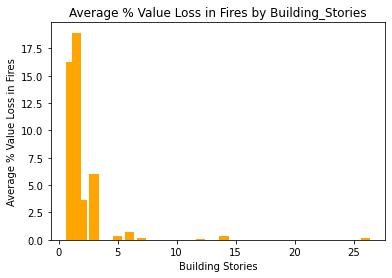

In [104]:
building_story = df['BUILDING STORIES'].unique()
building_story.sort()
print(building_story)

# plot avg. loss by battalion on scatter plot

x_axis=building_story
y_axis=avg_loss_by_stories
plt.bar(x_axis,y_axis,color=['orange'])

plt.xlabel("Building Stories")
plt.ylabel("Average % Value Loss in Fires")
plt.title("Average % Value Loss in Fires by Building_Stories")
